In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/monitoramento_tempo.csv')

In [4]:
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [5]:
df.tail()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
45248,282.00,1031.0,81.0,50.0,2.0,Terça,2017-11-29 20:00:00
45249,282.89,1030.0,71.0,330.0,1.0,Terça,2017-11-29 21:00:00
45250,283.39,1030.0,71.0,290.0,1.0,Terça,2017-11-29 22:00:00
45251,283.02,1029.0,71.0,290.0,2.0,Terça,2017-11-29 23:00:00
45252,282.28,1029.0,76.0,340.0,1.0,Quarta,2017-11-30 00:00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [7]:
import datetime
df['data'] = pd.to_datetime(df['data'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temperatura          45253 non-null  float64       
 1   pressão              45253 non-null  float64       
 2   humidade             45253 non-null  float64       
 3   direção do vento     45253 non-null  float64       
 4   velocidade do vento  45253 non-null  float64       
 5   dia_da_semana        45253 non-null  object        
 6   data                 45253 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.4+ MB


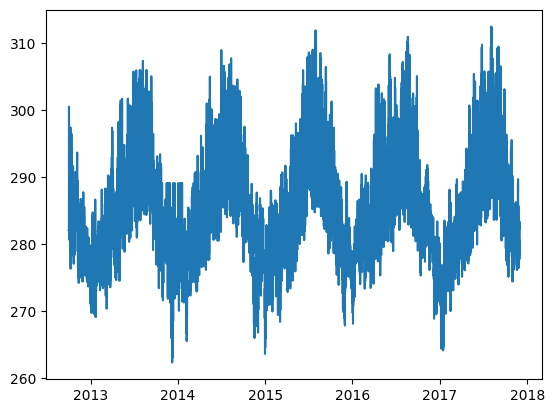

In [9]:
plt.plot(df['data'],df['temperatura'])

C:\Users\dsadm\AppData\Local\Temp\ipykernel_17484\2596087009.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  eixo.legend()


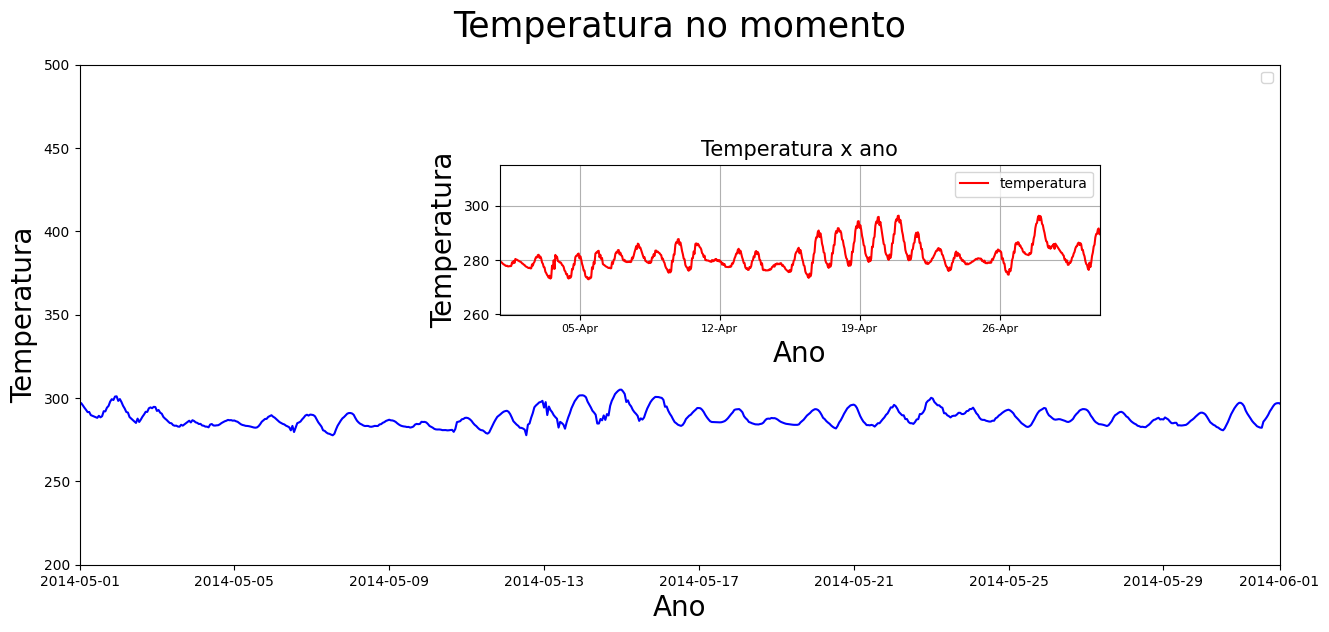

In [14]:
fig = plt.figure(figsize=(12,5))
eixo = fig.add_axes([0,0,1,1])
eixo.set_ylim(200,500)
eixo.plot(df['data'],df['temperatura'],color='b')

eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1))
eixo.set_title('Temperatura no momento', fontsize=25, pad=20)
eixo.set_xlabel('Ano', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend()

eixo2 = fig.add_axes([0.35,0.50,0.5,0.3])

eixo2.xaxis.set_major_locator(mdates.DayLocator(interval=7))
eixo2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

eixo2.set_xlim(datetime.datetime(2015,4,1),datetime.datetime(2015,5,1))
eixo2.tick_params(axis='x',labelsize=8)
eixo2.plot(df['data'],df['temperatura'],color='r')
eixo2.grid(True)
eixo2.set_title('Temperatura x ano', fontsize=15)
eixo2.set_ylabel('Temperatura', fontsize=20)
eixo2.set_xlabel('Ano', fontsize=20)
eixo2.legend(['temperatura'],loc='best',fontsize=10)